# Projet Data Mining 

Michael Ben Ali 

## Partie I : Etude des ventes d'un grossiste en produits parapharmaceutiques

Dans cette partie, nous effectuer l'analyse des données par les méthodes de règles d'associations et de filtrages collaboratif de dataset suivant. 
Notre dataset réprésente les ventes d'un grossiste en produit parapharmaceutiques en Tunisie au cours de l'année 2018. Au cours de cette année nous allons suivre les ventes de 10 articles différents au cours de cette année. 

## A) Analyse et formatage des données

In [21]:
import pandas as pd

In [71]:
# Importation du fichier excel correspondant au dataset
df = pd.read_excel('Dataset pharmacie.xls')

Le dataset a plusieur colonnes dont les colonnes client, type qui correspond au type de client entre pharmacies, parapharmacies et dépot pharmaceutiques. La colonne valeur correspond au prix de vente en Dinars Tunisien le reste et la quantité vendu par article. 
Les colonnes Mois et Code Mois sont inutiles pour nous.

In [72]:
df.head(10)

,Client,Type,Ville,Date,Mois,Code Mois,Valeur,Test de grossesse Stylo,Test de grossesse Bandelettes,Préservatifs B(3) Love condom,Préservatif B(6) Love condom,Préservatifs B(12) Love Condom,preventor classique,preventor parfumé,MOLDEX 1paire,MOLDEX 2 paire,MOLDEX REUTILISABLE,Préservatif ABSOLUTE
0,Pharmacie Mme Ben Hamida Tunis,PHARMACIE,Tunis,2018-02-06,0,2,1039.500,260,350,25,0,0,0,0,0,0,0,0
1,Pharmacie de Nuit Fouchene Tunis,PHARMACIE,Tunis,2018-02-07,0,2,323.000,75,0,60,0,0,0,0,0,0,0,0
2,Pharmacie mr Amine Bengagi Jendouba,PHARMACIE,Jandouba,2018-02-14,0,2,1670.000,0,1700,0,0,0,0,0,0,0,0,0
3,Ph Mr Abdersasatter Bouselem,PHARMACIE,NaN,2018-02-14,0,2,47.000,14,0,0,0,0,0,0,0,0,0,0
4,Ph Mme Kmicha Sousse,PHARMACIE,Sousse,2018-02-15,0,2,1442.000,0,0,240,120,60,0,0,0,0,0,0
5,Dépot NABEUL Cophadis,DEPOT,Nabeul,2018-02-19,0,2,3367.000,1000,1000,0,0,0,0,0,0,0,0,0
6,Dépot NABEUL Cophadis,DEPOT,Nabeul,2018-02-19,0,2,2995.000,0,0,1707,0,0,0,0,0,0,0,0
7,Dépôt Cophadis Nabeul,DEPOT,Nabeul,2018-02-19,0,2,1499.721,0,0,853,0,0,0,0,0,0,0,0
8,Dépôt Cophadis Nabeul,DEPOT,Nabeul,2018-02-19,0,2,1682.401,500,500,0,0,0,0,0,0,0,0,0
9,Pharmacie abd karim,PHARMACIE,NaN,2018-02-20,0,2,1191.000,535,0,0,0,0,0,0,0,0,0,0


In [73]:
df = df.drop(['Mois', 'Code Mois'], axis=1)

In [74]:
df.head(10)

,Client,Type,Ville,Date,Valeur,Test de grossesse Stylo,Test de grossesse Bandelettes,Préservatifs B(3) Love condom,Préservatif B(6) Love condom,Préservatifs B(12) Love Condom,preventor classique,preventor parfumé,MOLDEX 1paire,MOLDEX 2 paire,MOLDEX REUTILISABLE,Préservatif ABSOLUTE
0,Pharmacie Mme Ben Hamida Tunis,PHARMACIE,Tunis,2018-02-06,1039.500,260,350,25,0,0,0,0,0,0,0,0
1,Pharmacie de Nuit Fouchene Tunis,PHARMACIE,Tunis,2018-02-07,323.000,75,0,60,0,0,0,0,0,0,0,0
2,Pharmacie mr Amine Bengagi Jendouba,PHARMACIE,Jandouba,2018-02-14,1670.000,0,1700,0,0,0,0,0,0,0,0,0
3,Ph Mr Abdersasatter Bouselem,PHARMACIE,NaN,2018-02-14,47.000,14,0,0,0,0,0,0,0,0,0,0
4,Ph Mme Kmicha Sousse,PHARMACIE,Sousse,2018-02-15,1442.000,0,0,240,120,60,0,0,0,0,0,0
5,Dépot NABEUL Cophadis,DEPOT,Nabeul,2018-02-19,3367.000,1000,1000,0,0,0,0,0,0,0,0,0
6,Dépot NABEUL Cophadis,DEPOT,Nabeul,2018-02-19,2995.000,0,0,1707,0,0,0,0,0,0,0,0
7,Dépôt Cophadis Nabeul,DEPOT,Nabeul,2018-02-19,1499.721,0,0,853,0,0,0,0,0,0,0,0
8,Dépôt Cophadis Nabeul,DEPOT,Nabeul,2018-02-19,1682.401,500,500,0,0,0,0,0,0,0,0,0
9,Pharmacie abd karim,PHARMACIE,NaN,2018-02-20,1191.000,535,0,0,0,0,0,0,0,0,0,0


In [75]:
len(set(df['Client']))

292

In [76]:
# Ici, on observe que notre dataset possède 325 entrées et le type des objets du dataset est correcte. La date est bien au format datetime. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Client                          324 non-null    object        
 1   Type                            323 non-null    object        
 2   Ville                           285 non-null    object        
 3   Date                            324 non-null    datetime64[ns]
 4   Valeur                          324 non-null    float64       
 5   Test de grossesse Stylo         324 non-null    int64         
 6   Test de grossesse Bandelettes   324 non-null    int64         
 7   Préservatifs B(3) Love condom   324 non-null    int64         
 8   Préservatif B(6)  Love condom   324 non-null    int64         
 9   Préservatifs B(12) Love Condom  324 non-null    int64         
 10  preventor classique             324 non-null    int64         
 11  preven

In [77]:
df.columns

Index(['Client', 'Type', 'Ville', 'Date', 'Valeur', 'Test de grossesse Stylo ',
       'Test de grossesse Bandelettes', 'Préservatifs B(3) Love condom',
       'Préservatif B(6)  Love condom', 'Préservatifs B(12) Love Condom',
       'preventor classique', 'preventor parfumé', 'MOLDEX 1paire',
       'MOLDEX 2 paire ', 'MOLDEX REUTILISABLE', 'Préservatif ABSOLUTE '],
      dtype='object')

In [78]:
df = df.drop(['Préservatif ABSOLUTE '], axis=1)

Comme nos données sont des données de série temporelles, il serait intéréssant de mettre en index les dates. Les données présentes sont les données correspondant au mois de Février 2018 jusqu'au mois de décembre 2018

In [79]:
df = df.set_index('Date')

In [80]:
df

,Client,Type,Ville,Valeur,Test de grossesse Stylo,Test de grossesse Bandelettes,Préservatifs B(3) Love condom,Préservatif B(6) Love condom,Préservatifs B(12) Love Condom,preventor classique,preventor parfumé,MOLDEX 1paire,MOLDEX 2 paire,MOLDEX REUTILISABLE
Date,,,,,,,,,,,,,,
2018-02-06,Pharmacie Mme Ben Hamida Tunis,PHARMACIE,Tunis,1039.500,260,350,25,0,0,0,0,0,0,0
2018-02-07,Pharmacie de Nuit Fouchene Tunis,PHARMACIE,Tunis,323.000,75,0,60,0,0,0,0,0,0,0
2018-02-14,Pharmacie mr Amine Bengagi Jendouba,PHARMACIE,Jandouba,1670.000,0,1700,0,0,0,0,0,0,0,0
2018-02-14,Ph Mr Abdersasatter Bouselem,PHARMACIE,NaN,47.000,14,0,0,0,0,0,0,0,0,0
2018-02-15,Ph Mme Kmicha Sousse,PHARMACIE,Sousse,1442.000,0,0,240,120,60,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-03,PH NUIT KHEMAIS GUENDIL,PHARMACIE,GBOLLAT,367.144,51,90,0,0,0,0,15,0,0,0
2018-12-04,NARJESS,PHARMACIE,NABEUL,188.170,0,180,0,0,0,0,0,0,0,0
2018-12-25,CHAYATA MED NACER,PHARMACIE,SOUSSE,314.000,85,85,0,0,0,0,0,0,0,0


Pour plus de facilité d'observation de nos articles, nous allons renommé nos colonnes par les noms suivants : 
- Test de grossesse Stylo : T1
- Test de grossesse Bandelettes : T2
- Préservatifs B(3) Love condom : L3
- Préservatif B(6) Love condom : L6
- Préservatifs B(12) Love Condom L12
- preventor classique : P1
- preventor parfum : P2
- MOLDEX 1paire : M1
- MOLDEX 2 paire : M2
- MOLDEX REUTILISABLE : Mr

In [81]:
df.columns
List = ['Client','Type','Ville','Valeur','T1', 'T2', 'L3','L6','L12','P1','P2','M1','M2','Mr']
df.columns = List
df.head()

,Client,Type,Ville,Valeur,T1,T2,L3,L6,L12,P1,P2,M1,M2,Mr
Date,,,,,,,,,,,,,,
2018-02-06,Pharmacie Mme Ben Hamida Tunis,PHARMACIE,Tunis,1039.5,260,350,25,0,0,0,0,0,0,0
2018-02-07,Pharmacie de Nuit Fouchene Tunis,PHARMACIE,Tunis,323.0,75,0,60,0,0,0,0,0,0,0
2018-02-14,Pharmacie mr Amine Bengagi Jendouba,PHARMACIE,Jandouba,1670.0,0,1700,0,0,0,0,0,0,0,0
2018-02-14,Ph Mr Abdersasatter Bouselem,PHARMACIE,NaN,47.0,14,0,0,0,0,0,0,0,0,0
2018-02-15,Ph Mme Kmicha Sousse,PHARMACIE,Sousse,1442.0,0,0,240,120,60,0,0,0,0,0


En utilisant la fonction describe, on obtient les valeurs statistiques du dataset. On obeserve que les derniers articles n'a pas été vendu au cours de cette année. 

In [82]:
df.describe()

/home/michael/anaconda3/lib/python3.9/site-packages/pandas/core/nanops.py:1723: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=1, interpolation=interpolation)
/home/michael/anaconda3/lib/python3.9/site-packages/pandas/core/nanops.py:1723: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=1, interpolation=interpolation)
/home/michael/anaconda3/lib/python3.9/site-packages/pandas/core/nanops.py:1723: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.


,Valeur,T1,T2,L3,L6,L12,P1,P2,M1,M2,Mr
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,570.429466,124.416667,85.401235,16.191358,3.898148,1.444444,8.617284,27.033951,2.450617,5.953704,4.228395
std,1201.416578,441.654765,649.982000,113.569991,16.185806,6.906272,33.553365,96.164697,7.203845,45.118705,44.524704
min,-676.875000,-170.000000,-6000.000000,0.000000,-24.000000,-12.000000,-15.000000,-36.000000,0.000000,-14.000000,0.000000
25%,62.416250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,206.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,611.582250,75.000000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,14651.000000,3520.000000,9000.000000,1707.000000,125.000000,60.000000,384.000000,1152.000000,60.000000,800.000000,800.000000


Pour mieux observer les valeurs statistiques, nous devons visualiser ces données par différent plot. On partira du postulat que les saisons affectes les ventes des produits. Donc on effectura un découpage saisonier entre 4 saisons. Les mois de Mars, Avril, Mai correspondant à la saison printemps, les Mois Mai, Juin, Juillet à l'été, Septembre, Octobre, Novembre à l'automne et Decembre, Janvier, Fevrier à l'hiver. 

In [34]:
printemps= (df.index.month>=3)&(df.index.month<=5)
ete = (df.index.month>=6)&(df.index.month<=8)
automne = (df.index.month>=9)&(df.index.month<=11)
hiver = (df.index.month==2)|(df.index.month==12)


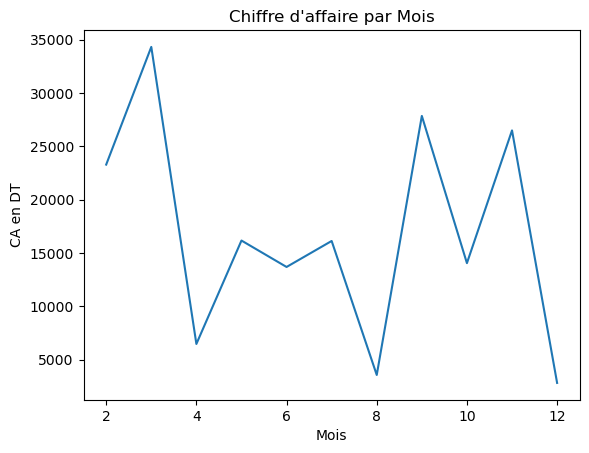

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(df.groupby(df.index.month).sum()['Valeur'])
plt.title("Chiffre d'affaire par Mois")
plt.xlabel("Mois")
plt.ylabel("CA en DT")
plt.show()


ICI, ON EXPRIME LA QUANTITE MOYENNE D'ARTICLE VENDU PAR SAISON PAR CLIENT


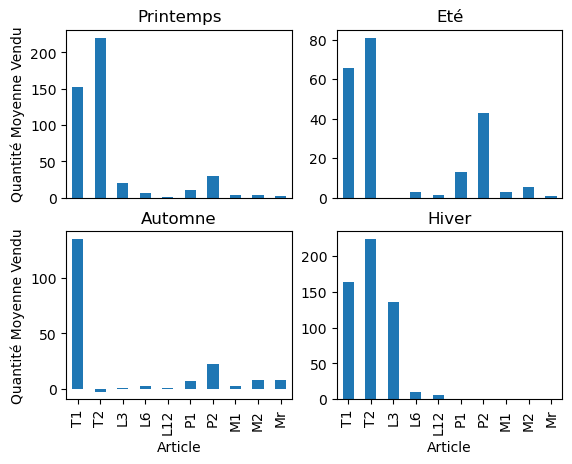

In [36]:
print("ICI, ON EXPRIME LA QUANTITE MOYENNE D'ARTICLE VENDU PAR SAISON PAR CLIENT")
A = df[printemps].describe().iloc[1][1:]
B = df[ete].describe().iloc[1][1:]
C = df[automne].describe().iloc[1][1:]
D = df[hiver].describe().iloc[1][1:]
plt.title('Vente moyenne')
plt.subplot(2,2,1)
A.plot(kind='bar')
plt.title("Printemps")
plt.xticks([]) 
plt.ylabel("Quantité Moyenne Vendu")
plt.subplot(2,2,2)
B.plot(kind='bar')
plt.title("Eté")
plt.xticks([]) 
 

plt.subplot(2,2,3)
C.plot(kind='bar')
plt.title("Automne")
plt.xlabel("Article")
plt.ylabel("Quantité Moyenne Vendu")
plt.subplot(2,2,4)
D.plot(kind='bar')
plt.title("Hiver")
plt.xlabel("Article")
plt.show()

In [37]:
Data = df[df.columns[4:]]

In [38]:
Data.head()

,T1,T2,L3,L6,L12,P1,P2,M1,M2,Mr
Date,,,,,,,,,,
2018-02-06,260,350,25,0,0,0,0,0,0,0
2018-02-07,75,0,60,0,0,0,0,0,0,0
2018-02-14,0,1700,0,0,0,0,0,0,0,0
2018-02-14,14,0,0,0,0,0,0,0,0,0
2018-02-15,0,0,240,120,60,0,0,0,0,0


Concernant la suite, pour nos algorithmes de Data Mining, il est nécessaire de formater les valeurs du tableau sous forme boléenne pour l'algorithme à priori. 

In [39]:
f = lambda x: True if x !=0 else False 

In [40]:
Dataprio = Data.applymap(f)
Dataprio

,T1,T2,L3,L6,L12,P1,P2,M1,M2,Mr
Date,,,,,,,,,,
2018-02-06,True,True,True,False,False,False,False,False,False,False
2018-02-07,True,False,True,False,False,False,False,False,False,False
2018-02-14,False,True,False,False,False,False,False,False,False,False
2018-02-14,True,False,False,False,False,False,False,False,False,False
2018-02-15,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2018-12-03,True,True,False,False,False,False,True,False,False,False
2018-12-04,False,True,False,False,False,False,False,False,False,False
2018-12-25,True,True,False,False,False,False,False,False,False,False


Notre dataframe est enfin prêt pour appliquer nos algorithmes de Data Mining. 

## B) Extraction de connaissances par « Règles d’association » 


Dans cette partie, nous allons utiliser l'algorithme apriori pour extraire les règles d'association saison des articles. 

In [41]:
from mlxtend.frequent_patterns import apriori
import calendar

Commençons par utiliser l'algorithme sur le dataset complet.

In [42]:
apriori(Dataprio,min_support=0.1,use_colnames =True).sort_values(['support'],ascending = False)

,support,itemsets
0,0.336420,(T1)
6,0.327160,(M2)
1,0.256173,(T2)
4,0.243827,(P2)
7,0.240741,(Mr)
5,0.231481,(M1)
3,0.188272,(P1)
8,0.166667,"(T2, T1)"
12,0.166667,"(Mr, M2)"
10,0.163580,"(M1, M2)"


On observe un support global les plus élévés ici dans l'ordre décroissant. Pour les bi-support, on observe que au cours de l'année chaque type d'articles (Test, Bouchon et préservatifs) se vendent mieux ensemble.

Mais au final, On observe que les résultat ne sont pas très concluant, on va donc effectuer un coupe saisonnière pour prendre eventuellement réfléchir à une solution trimestrielle. 

In [43]:
Dict = {}
saison = [printemps,ete,automne,hiver]
saisonstr = ["printemps","ete","automne","hiver"]
for i in range(4):
    Dict[i] = Dataprio[saison[i]]
    Dict[i] = apriori(Dict[i],min_support=0.1,use_colnames =True).sort_values(['support'],ascending = False)

In [44]:
for i in range(4):
    print(" Les supports la saison {} sont :".format(saisonstr[i]))
    print(Dict[i])
    print(" ")

 Les supports la saison printemps sont :
     support  itemsets
0   0.394366      (T1)
1   0.267606      (T2)
6   0.239437      (M2)
5   0.211268      (M1)
7   0.183099      (Mr)
8   0.154930  (T2, T1)
9   0.154930  (M1, M2)
4   0.140845      (P2)
3   0.126761      (L6)
10  0.126761  (Mr, M2)
2   0.112676      (L3)
 
 Les supports la saison ete sont :
     support   itemsets
7   0.435897       (M2)
1   0.384615       (T2)
0   0.371795       (T1)
8   0.294872   (T2, T1)
5   0.256410       (P2)
4   0.205128       (P1)
13  0.179487   (P1, P2)
6   0.166667       (M1)
2   0.141026       (L6)
3   0.141026      (L12)
10  0.115385  (L12, L6)
15  0.115385   (M1, M2)
9   0.102564   (P2, T1)
11  0.102564   (P2, L6)
12  0.102564  (L12, P2)
14  0.102564   (P2, M2)
 
 Les supports la saison automne sont :
     support      itemsets
7   0.391892          (Mr)
6   0.364865          (M2)
4   0.324324          (P2)
5   0.317568          (M1)
14  0.290541      (Mr, M2)
3   0.256757          (P1)
0   0.23

Séparons et interprétons nos résultats par saisons.

In [49]:
print('Saison printemps')
Dict[0]

Saison printemps


,support,itemsets
0,0.394366,(T1)
1,0.267606,(T2)
6,0.239437,(M2)
5,0.211268,(M1)
7,0.183099,(Mr)
8,0.154930,"(T2, T1)"
9,0.154930,"(M1, M2)"
4,0.140845,(P2)
3,0.126761,(L6)
10,0.126761,"(Mr, M2)"


Ici, on observe à cette période une forte vente de test de grossesse. Le bi-support des tests de grossesse est le bi-support le plus élévé. Ils serait intéréssant de présenter des pack promotionnel comportant les deux articles combinées.

De même, pour les bouchons d'oreilles. Un pack promotionnel comportantn M1,M2 et Mr,M2 pourrait insité le client à acheté les deux

In [50]:
print('Saison été')
Dict[1]

Saison été


,support,itemsets
7,0.435897,(M2)
1,0.384615,(T2)
0,0.371795,(T1)
8,0.294872,"(T2, T1)"
5,0.256410,(P2)
4,0.205128,(P1)
13,0.179487,"(P1, P2)"
6,0.166667,(M1)
2,0.141026,(L6)
3,0.141026,(L12)


Concernant la saison d'été on remarque que les bouchons on le supoort le plus élévé, surement à cause de la plage. On observe ici un support plus important pour les préservatifs. Encore une fois des packs promotionneles combinant les articles avec les support élévés serait intéréssant.

In [51]:
print('Saison Automne')
Dict[2]

Saison Automne


,support,itemsets
7,0.391892,(Mr)
6,0.364865,(M2)
4,0.324324,(P2)
5,0.317568,(M1)
14,0.290541,"(Mr, M2)"
3,0.256757,(P1)
0,0.236486,(T1)
9,0.236486,"(P1, P2)"
12,0.222973,"(M1, M2)"
13,0.189189,"(Mr, M1)"


Ici, on observe encore une vente élévé des bouchons d'oreilles. Cela pourrait avoir un rapport avec la rentré scolaire et le début de l'apparition du vent. Foccalisé sur ces articles pendant cette période serait intéréssant. 

In [52]:
print('Saison hiver')
Dict[3]

Saison hiver


,support,itemsets
0,0.629630,(T1)
1,0.518519,(T2)
2,0.296296,(L3)
5,0.296296,"(T2, T1)"
3,0.111111,(L6)
4,0.111111,(L12)
6,0.111111,"(L3, T1)"
7,0.111111,"(L3, T2)"
8,0.111111,"(L3, L6)"
9,0.111111,"(L3, L12)"


Durant la saison d'hiver la vente de test de grossesses reste la plus élévé. Cependant à cette période on remarque une augmentation de préservatif L3,6,12. On remarque que le support de ces articles combinés avec les tests et ensemble est concéquant. Combiner ces articles ensembles dans des packs promotionnels nous donnerais un intérêt intéréssant.  

## C) Recommandation par algorithmes de filtrage collaboratif 


### 1) Similarité Article-Client

Ici nous cherchons la liste des clients avec le plus grand nombre d'occurance de vente : 

In [83]:
best = df[['Client','Valeur']].groupby('Client').count().sort_values('Valeur',ascending =False)

In [88]:
best

,Valeur
Client,
BIG PARA (Zied Ayadi),7
MEDEX,5
PH LABESSI,2
PH Othmn ben gagi,2
Fantar,2
...,...
Nuit,1
Nuit Abdennather Med SALAMBO,1
Nuit Hammam Lif,1


In [89]:
best = best.head()

In [92]:
# List des top 5 clients
best_list = best.index

In [95]:
list(best_list)

['BIG PARA (Zied Ayadi)',
 'MEDEX',
 'PH LABESSI ',
 'PH Othmn ben gagi',
 'Fantar']

In [55]:
import numpy as np

In [99]:
_ = df
df = Data

In [119]:
filtrage = df[df['Client'].isin(list(best_list))].groupby('Client').sum()

In [120]:
best_client =filtrage.index

In [125]:
filtrage.reset_index()

,Client,T1,T2,L3,L6,L12,P1,P2,M1,M2,Mr
0,BIG PARA (Zied Ayadi),17000,3000,0,0,0,0,0,0,800,800
1,Fantar,0,137,0,0,0,15,45,0,0,0
2,MEDEX,510,180,0,15,0,15,36,0,14,0
3,PH LABESSI,0,0,0,45,22,0,0,0,0,7
4,PH Othmn ben gagi,3000,3000,0,0,0,0,0,0,0,0


En utilisant, la corrélation de Pearson, nous allons observer la similarité entre les clients. 

In [122]:
import seaborn as sns

In [129]:
filtrage = filtrage.transpose()

Nous obtenons la matrice de corrélations suivante : 

In [134]:
corr = filtrage.corr()
corr

Client,BIG PARA (Zied Ayadi),Fantar,MEDEX,PH LABESSI,PH Othmn ben gagi
Client,,,,,
BIG PARA (Zied Ayadi),1.000000,-0.006978,0.980608,-0.216431,0.779918
Fantar,-0.006978,1.000000,0.178568,-0.248356,0.589398
MEDEX,0.980608,0.178568,1.000000,-0.231019,0.873837
PH LABESSI,-0.216431,-0.248356,-0.231019,1.000000,-0.260952
PH Othmn ben gagi,0.779918,0.589398,0.873837,-0.260952,1.000000


Pour mieux observer notre résultat, observons la matrice de chaleur: 

/tmp/ipykernel_7531/2137406038.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:xlabel='Client', ylabel='Client'>

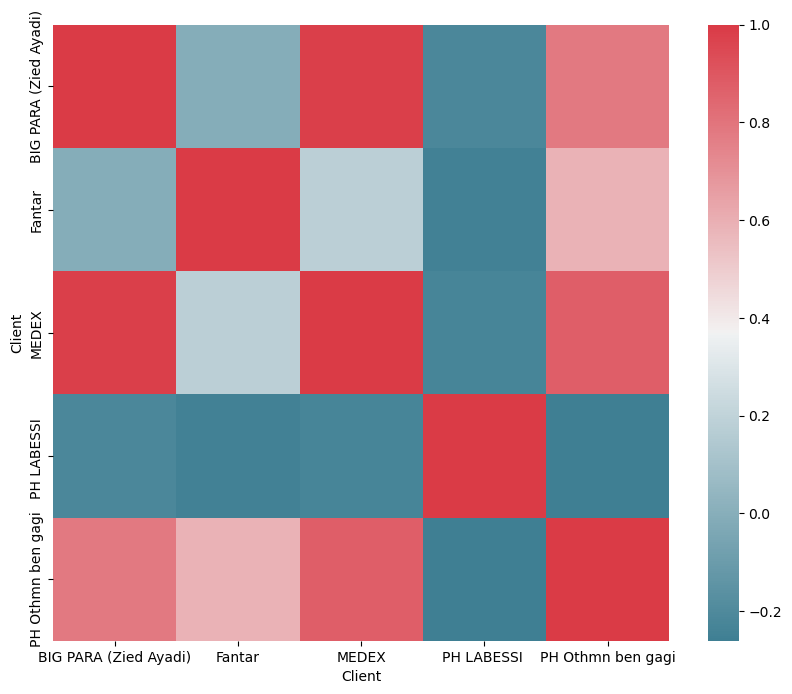

In [133]:
f, ax = plt.subplots(figsize=(10, 8))
corr = filtrage.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

On rappelle que pour la matrice de chaleur, plus la couleur est chaude (rouge) plus les clients, on une corrélation forte. Ils seront donc susceptible d'acheter des produits similaires.

### 2) Similarité Article-Article

In [141]:
sim = Data.drop('Client', axis = 1)
sim

,T1,T2,L3,L6,L12,P1,P2,M1,M2,Mr
Date,,,,,,,,,,
2018-02-06,260,350,25,0,0,0,0,0,0,0
2018-02-07,75,0,60,0,0,0,0,0,0,0
2018-02-14,0,1700,0,0,0,0,0,0,0,0
2018-02-14,14,0,0,0,0,0,0,0,0,0
2018-02-15,0,0,240,120,60,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2018-12-03,51,90,0,0,0,0,15,0,0,0
2018-12-04,0,180,0,0,0,0,0,0,0,0
2018-12-25,85,85,0,0,0,0,0,0,0,0


In [144]:
Nbligne = len(sim.axes[0])
Nbcolonne = len(sim.axes[1])

In [160]:
matrice = sim.to_numpy().transpose()

In [163]:
matrice.shape

(10, 324)

In [166]:
from scipy import spatial
def similaritetCosinus(i,j):
    return(1-spatial.distance.cosine(matrice[i],matrice[j] ))

Calculons la distance cosine entre chacun des articles pour obtenir la matrice de similarité : 

In [167]:
cosine = np.zeros((Nbcolonne, Nbcolonne))

In [168]:
for u1 in range(10):
    for u2 in range(10):
        cosine[u1][u2]=similaritetCosinus(u1,u2)  
print(cosine)

[[1.00000000e+00 1.31095291e-01 1.10188451e-02 2.43187966e-02
  1.51612362e-02 3.12268327e-02 5.22471039e-02 4.00512582e-03
  2.31714095e-03 6.90107551e-04]
 [1.31095291e-01 1.00000000e+00 1.02989191e-02 1.64729965e-02
  1.13052544e-02 7.48601692e-03 1.64291963e-02 1.18084910e-03
  8.69240363e-04 3.21301914e-04]
 [1.10188451e-02 1.02989191e-02 1.00000000e+00 2.19848934e-01
  2.32227763e-01 2.33681665e-03 6.35341108e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.43187966e-02 1.64729965e-02 2.19848934e-01 1.00000000e+00
  6.45545790e-01 3.91278979e-01 2.89115074e-01 1.50260772e-02
  1.27351204e-02 2.85616294e-03]
 [1.51612362e-02 1.13052544e-02 2.32227763e-01 6.45545790e-01
  1.00000000e+00 1.25617122e-01 1.16383946e-01 9.24742152e-02
  2.01299427e-02 7.66166340e-03]
 [3.12268327e-02 7.48601692e-03 2.33681665e-03 3.91278979e-01
  1.25617122e-01 1.00000000e+00 6.25644126e-01 8.23692239e-02
  2.51093621e-02 3.37660102e-03]
 [5.22471039e-02 1.64291963e-02 6.35341108e-03 2.89115074e

In [172]:
cosine = np.matrix(cosine)

In [175]:
cosinedf = pd.DataFrame(cosine)

In [178]:
Data.columns[:-1]

Index(['T1', 'T2', 'L3', 'L6', 'L12', 'P1', 'P2', 'M1', 'M2', 'Mr', 'Client'], dtype='object')

In [179]:
cosinedf.colums = Data.columns[:-1]

In [181]:
cosinedf.index= Data.columns[:-1]

In [183]:
cosinedf.index

Index(['T1', 'T2', 'L3', 'L6', 'L12', 'P1', 'P2', 'M1', 'M2', 'Mr'], dtype='object')

In [186]:
cosinedf.columns = Data.columns[:-1]
cosinedf

,T1,T2,L3,L6,L12,P1,P2,M1,M2,Mr
T1,1.000000,0.131095,0.011019,0.024319,0.015161,0.031227,0.052247,0.004005,0.002317,0.000690
T2,0.131095,1.000000,0.010299,0.016473,0.011305,0.007486,0.016429,0.001181,0.000869,0.000321
L3,0.011019,0.010299,1.000000,0.219849,0.232228,0.002337,0.006353,0.000000,0.000000,0.000000
L6,0.024319,0.016473,0.219849,1.000000,0.645546,0.391279,0.289115,0.015026,0.012735,0.002856
L12,0.015161,0.011305,0.232228,0.645546,1.000000,0.125617,0.116384,0.092474,0.020130,0.007662
P1,0.031227,0.007486,0.002337,0.391279,0.125617,1.000000,0.625644,0.082369,0.025109,0.003377
P2,0.052247,0.016429,0.006353,0.289115,0.116384,0.625644,1.000000,0.018462,0.019880,0.003180
M1,0.004005,0.001181,0.000000,0.015026,0.092474,0.082369,0.018462,1.000000,0.102579,0.030434
M2,0.002317,0.000869,0.000000,0.012735,0.020130,0.025109,0.019880,0.102579,1.000000,0.983814
Mr,0.000690,0.000321,0.000000,0.002856,0.007662,0.003377,0.003180,0.030434,0.983814,1.000000


/tmp/ipykernel_7531/3980945998.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cosinedf, mask=np.zeros_like(cosinedf, dtype=np.bool),


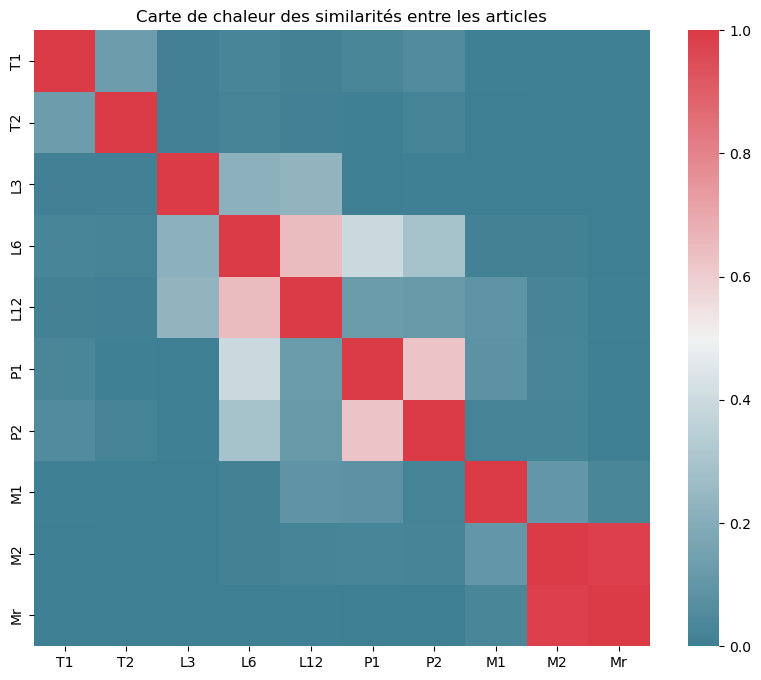

In [188]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cosinedf, mask=np.zeros_like(cosinedf, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Carte de chaleur des similarités entre les articles')
plt.show()

On voit avec la carte de chaleur que les similarités cosine entre les articles sont globalement en dessous de 0,5. Seulement les articles, M2 et Mr puis L6 et L12 on une similarité cosine élevé. Ce qui montre que ces articles doivent être recommandés ensembles. On retombe un peu sur la logique que l'on a eu sur la partie A. 

## Partie II : Webmining: Application sur un réseau communautaire scientifique

Notre étude se basera sur le NIPS Paper Dataset. Il s'agit ici d'une collection d'article scientifique sur le sujet "Neural Information Processing Systems". Ici, on étudiera les liens entre les différents auteurs mentionnées dans les articles scientifiques. Chaque auteur sera un noeud et chaque mention dans un article un lien. Il est clair que l'on peut appliquer ici les algorithme de Webmining sur notre dataset. 

In [190]:
import community

In [191]:
# SQL
import sqlite3

# Graph
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Combinations
import itertools

Nous allons seulement considérer les "NIPS papers" des années 2016/2017. Pour télécharger le dataset, suivre le lien suivant : 

https://www.kaggle.com/datasets/benhamner/nips-papers?select=database.sqlite 

Télécharger le fichier database.sqlite .

In [192]:
# Get data
connect = sqlite3.connect('database.sqlite')
query = """
SELECT pa.paper_id, pa.author_id, a.name
FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
JOIN authors as a ON pa.author_id = a.id
WHERE p.Year BETWEEN '2016' AND '2017'
"""
df = pd.read_sql(query, connect)

# Have a look at data
df.head(10)

,paper_id,author_id,name
0,6589,8395,Bryan D. He
1,6589,8016,Christopher M. De Sa
2,6589,6549,Ioannis Mitliagkas
3,6589,7222,Christopher R?
4,6406,9007,yan yang
5,6406,7877,Jian Sun
6,6406,9008,Huibin Li
7,6406,9009,Zongben Xu
8,6176,3961,Richard Nock
9,6176,8300,Aditya Menon


In [193]:
# Initialize graph
G = nx.Graph()

# Transform
# REMARK: The algorithm seems more stable by doing '*=2' than '+=1'
# REMARK: I use 'name' instead of 'author_id' for label purposes.
for p, a in df.groupby('paper_id')['name']: 
    for u, v in itertools.combinations(a, 2):
        if G.has_edge(u, v):
            G[u][v]['weight'] *= 2
        else:
            G.add_edge(u, v, weight=1)
            
# Print graph size
print('\nSize of graph, i.e. number of edges:', G.size())


Size of graph, i.e. number of edges: 6709


## Compute best partition

In [196]:
import community.community_louvain as community_louvain

In [197]:
# Get best partition
partition = community_louvain.best_partition(G)

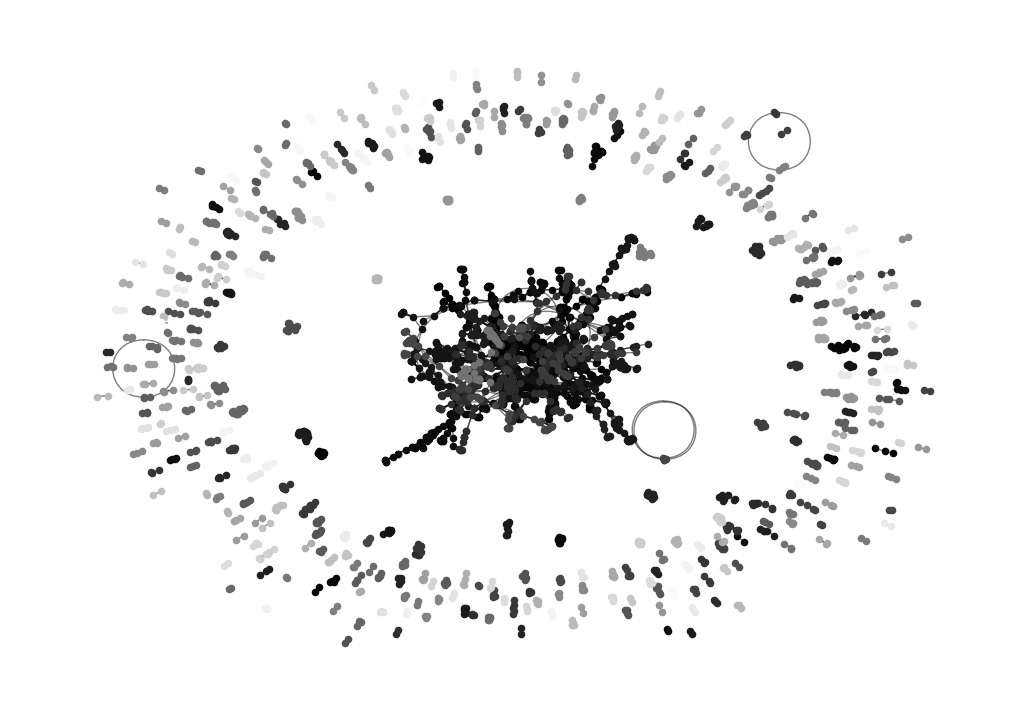

In [198]:
# Draw graph
plt.figure(figsize=(13, 9))
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

## Partie A : Hits and PageRank 

Ici, on va utiliser les algoritmes hits et pagerank pour étudier notre cas. Notre cas est similaire à l'étude des réseaux sociaux car chaque article est une page et chaque auteurs un lien. Un lecteur d'un article sera alors intéréssé par consulté la référence de l'article se qui correspond au clic de nos liens dans les algorithmes. 

In [9]:
all_cliques = list(nx.enumerate_all_cliques(G))
len(all_cliques)

72421

In [10]:
nbr_cliq = nx.graph_clique_number(G, cliques=nx.find_cliques(G))
nbr_cliq

15

In [11]:
import community.community_louvain 
partition = community.community_louvain.best_partition(G)    

In [12]:
from networkx.algorithms.community import greedy_modularity_communities
g= greedy_modularity_communities(G)


In [13]:
def hits(G, max_iter=10, tol=1.0e-8, nstart=None, normalized=True):

    import numpy as np
    import scipy as sp
    import scipy.sparse.linalg  # call as sp.sparse.linalg

    if len(G) == 0:
        return {}, {}
    A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)

    if nstart is None:
        _, _, vt = sp.sparse.linalg.svds(A, k=1, maxiter=max_iter, tol=tol)
    else:
        nstart = np.array(list(nstart.values()))
        _, _, vt = sp.sparse.linalg.svds(A, k=1, v0=nstart, maxiter=max_iter, tol=tol)

    a = vt.flatten().real
    h = A @ a
    if normalized:
        h /= h.sum()
        a /= a.sum()
    hubs = dict(zip(G, map(float, h)))
    authorities = dict(zip(G, map(float, a)))
    return hubs, authorities

In [14]:
hits_algo = hits(G)

In [15]:
def _pagerank_python(
    G,
    alpha=0.85,
    personalization=None,
    max_iter=100,
    tol=1.0e-6,
    nstart=None,
    weight="weight",
    dangling=None,
):
    if len(G) == 0:
        return {}

    D = G.to_directed()

    # Create a copy in (right) stochastic form
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()

    # Choose fixed starting vector if not given
    if nstart is None:
        x = dict.fromkeys(W, 1.0 / N)
    else:
        # Normalized nstart vector
        s = sum(nstart.values())
        x = {k: v / s for k, v in nstart.items()}

    if personalization is None:
        # Assign uniform personalization vector if not given
        p = dict.fromkeys(W, 1.0 / N)
    else:
        s = sum(personalization.values())
        p = {k: v / s for k, v in personalization.items()}

    if dangling is None:
        # Use personalization vector if dangling vector not specified
        dangling_weights = p
    else:
        s = sum(dangling.values())
        dangling_weights = {k: v / s for k, v in dangling.items()}
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]

    # power iteration: make up to max_iter iterations
    for _ in range(max_iter):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            # this matrix multiply looks odd because it is
            # doing a left multiply x^T=xlast^T*W
            for _, nbr, wt in W.edges(n, data=weight):
                x[nbr] += alpha * xlast[n] * wt
            x[n] += danglesum * dangling_weights.get(n, 0) + (1.0 - alpha) * p.get(n, 0)
        # check convergence, l1 norm
        err = sum(abs(x[n] - xlast[n]) for n in x)
        if err < N * tol:
            return x
    raise nx.PowerIterationFailedConvergence(max_iter)




In [16]:
pagerank= _pagerank_python(G)

In [34]:
from collections import Counter
Counter(hits_algo[0]).most_common()[30]

('Katherine A. Heller', 0.003575587900810794)

In [35]:
Counter(hits_algo[1]).most_common()[30]

('Katherine A. Heller', 0.0035755879008107995)

In [31]:
hits_algo[0]["Eli Gutin"]

-0.0

Les 4 hubs les plus importants / Hubs de qualité sont les pages 'Lawrence Carin', 'Chunyuan Li', 'Ricardo Henao', 'Zhe Gan'. Ce sont les 4 auteurs avec un degré d'autorité supérieur à 0.1. Tous les autres auteurs sont en dessous de ce seuil. Le premier est le degré d'autorité, le deuxième est le degré en temps que hub. On remarques des valeurs similaires pour les 10 premiers auteurs. 

In [29]:
Counter(pagerank).most_common()[:10]

[('Lawrence Carin', 0.0026076902519994154),
 ('Pieter Abbeel', 0.0017445255612426),
 ('Xi Chen', 0.001623661633394911),
 ('Nati Srebro', 0.0015524719366732667),
 ('Barnabas Poczos', 0.0015212723640628193),
 ('Yoshua Bengio', 0.001501471046023061),
 ('Josh Tenenbaum', 0.001492090914526487),
 ('Ruslan R. Salakhutdinov', 0.0014215879631858824),
 ('Jiajun Wu', 0.0014085675770733877),
 ('Nicolas Heess', 0.001380258850427849)]

Pour l'algorithme pagerank on trouve les top 3 auteurs sont 'Lawrence Carin','Pieter Abbeel', 'Xi Chen'. Cependant seulement 'Lawrence Carin' est commun à l'algorithme Hits et Pagerank

In [30]:
coef_clust = nx.clustering(G) #coefficient de clustering

In [31]:
Nodes_degree = G.degree() #degré du noeud
for i in Counter(dict(Nodes_degree)).most_common()[:10]:
    print(i)
print('Ici on observe les 10 noeuds au degré le plus élévé')

('Nicolas Heess', 41)
('Lawrence Carin', 36)
('Pieter Abbeel', 33)
('Razvan Pascanu', 33)
('David Silver', 31)
('Oriol Vinyals', 30)
('Ruslan R. Salakhutdinov', 28)
('Liam Paninski', 28)
('Peter Battaglia', 27)
('Christopher R?', 26)
Ici on observe les 10 noeuds au degré le plus élévé


In [32]:
bet_centrali = nx.betweenness_centrality(G) #centralité d'intermédiarité

Meilleur centralité intermédiaire.

In [33]:
Counter(dict(bet_centrali)).most_common()[:10]

[('Barnabas Poczos', 0.045391978630851156),
 ('Nati Srebro', 0.0442090180454919),
 ('Michael I. Jordan', 0.042910534916730095),
 ('Yuhuai Wu', 0.04180661560550557),
 ('Bernhard Sch?lkopf', 0.03993698016865555),
 ('Ruslan R. Salakhutdinov', 0.037485320059888166),
 ('David K. Duvenaud', 0.027982463590747787),
 ('Ce Zhang', 0.027535776317193637),
 ('Olivier Bousquet', 0.025539650223194526),
 ('Moritz Hardt', 0.02534086118001911)]

In [34]:
close_centrali = nx.closeness_centrality(G)

Meilleurs centralité proches

In [35]:
Counter(dict(close_centrali)).most_common()[:10]

[('Ruslan R. Salakhutdinov', 0.07845783944311495),
 ('Barnabas Poczos', 0.07842865487791602),
 ('Nati Srebro', 0.07834123130918909),
 ('Yuhuai Wu', 0.07641061869900855),
 ('Michael I. Jordan', 0.07475796023997078),
 ('Moritz Hardt', 0.07388472159682195),
 ('Yu Cheng', 0.07325154621776407),
 ('Oriol Vinyals', 0.07310761691983272),
 ('Eric P. Xing', 0.07309916810243763),
 ('Mitchell Stern', 0.07309072123762339)]

## Partie B : Detection de communauté 

Regardons les communautés detectés les plus larges, celles avec un minimum de 50 membres. 

In [199]:
# Keep only communities with a minimum of authors
centers = {}
communities = {}
G_main_com = G.copy()
min_nb = 50
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    if len(list_nodes) < min_nb:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        # Print community
        print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' authors:')
        print(list_nodes, '\n')

Community of  Christopher R? (ID  1 ) -  99  authors:
['Peng Xu', 'Jiyan Yang', 'Farbod Roosta-Khorasani', 'Christopher R?', 'Michael W. Mahoney', 'Kevin G. Jamieson', 'Daniel Haas', 'Benjamin Recht', 'Reza Eghbali', 'Maryam Fazel', 'Alnur Ali', 'J. Zico Kolter', 'Ryan J. Tibshirani', 'Mingsheng Long', 'Han Zhu', 'Jianmin Wang', 'Michael I. Jordan', 'Michael Saunders', 'Yuekai Sun', 'Chi Jin', 'Yuchen Zhang', 'Sivaraman Balakrishnan', 'Martin J. Wainwright', 'Jisu KIM', 'Yen-Chi Chen', 'Alessandro Rinaldo', 'Larry Wasserman', 'Alexander J. Ratner', 'Christopher M. De Sa', 'Sen Wu', 'Daniel Selsam', 'Lalit Jain', 'Rob Nowak', 'Veeranjaneyulu Sadhanala', 'Yu-Xiang Wang', 'Amin Jalali', 'Qiyang Han', 'Ioana Dumitriu', 'Bryan D. He', 'Ioannis Mitliagkas', 'Xinghao Pan', 'Maximilian Lam', 'Stephen Tu', 'Dimitris Papailiopoulos', 'Ce Zhang', 'Kannan Ramchandran', 'Kwang-Sung Jun', 'Aniruddha Bhargava', 'Robert Nowak', 'Rebecca Willett', 'Paroma Varma', 'Payal Bajaj', 'Nishith Khandwala', 'Im

## Graphe Communautaire.
Ici on a notre graphe correspondant aux commauntés avec le nombre de membres

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

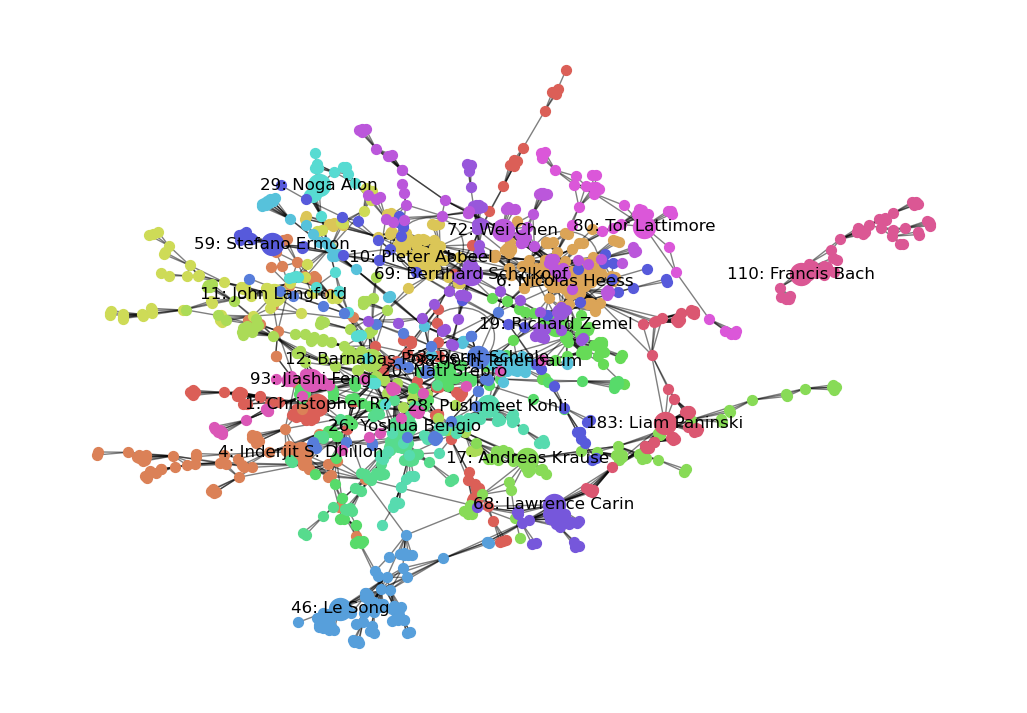

In [42]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # Display graph
    plt.figure(figsize=(13, 9))
    node_size = 50
    count = 0
    pos = nx.spring_layout(G_main_com)
    colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

    for com in communities.keys():
        count = count + 1
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
        nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size = node_size, node_color = colors[com])
        nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size = node_size*5, node_color = colors[com])
    nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)
    labels = {k: str(v) + ': ' + k for k,v in centers.items()}
    nx.draw_networkx_labels(G_main_com, pos, labels)
    plt.axis('off')
    plt.show()


In [43]:
# Display induced graph
nodes_main_com = {k: v for k, v in partition.items() if v in communities}
ind = community_louvain.induced_graph(nodes_main_com, G_main_com)
print('Number of communities', len(ind.nodes()))

Number of communities 23


Le nombre de communauté affiché ici, important puis le communautés principales avec leurs normbre de noeuds. 

In [44]:
communities


Main communities and their center node: {1: 'Christopher R?', 4: 'Inderjit S. Dhillon', 6: 'Nicolas Heess', 10: 'Pieter Abbeel', 11: 'John Langford', 12: 'Barnabas Poczos', 17: 'Andreas Krause', 19: 'Richard Zemel', 20: 'Nati Srebro', 26: 'Yoshua Bengio', 28: 'Pushmeet Kohli', 29: 'Noga Alon', 38: 'Josh Tenenbaum', 46: 'Le Song', 53: 'Bernt Schiele', 59: 'Stefano Ermon', 68: 'Lawrence Carin', 69: 'Bernhard Sch?lkopf', 72: 'Wei Chen', 80: 'Tor Lattimore', 93: 'Jiashi Feng', 110: 'Francis Bach', 183: 'Liam Paninski'}


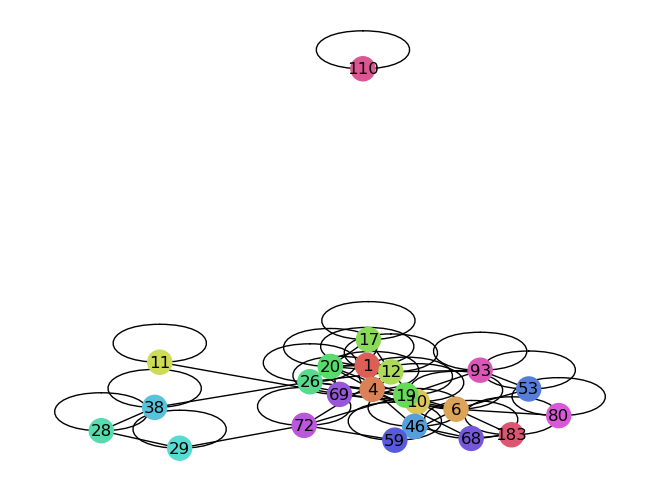

In [48]:
# Display induced graph
pos_ind = nx.spring_layout(ind)
labels = {k: str(k) + ': ' + v for k,v in communities.items()}
nx.draw(ind, pos_ind, nodelist=list(colors.keys()), node_color=list(colors.values()), labels=None)
plt.show()

Le graphe ci-dessus correspond aux communautés, leurs membres et leurs liens.